# matplotlib 基础

导入库文件

In [1]:
import matplotlib.pyplot as plt
import numpy as np

### Example

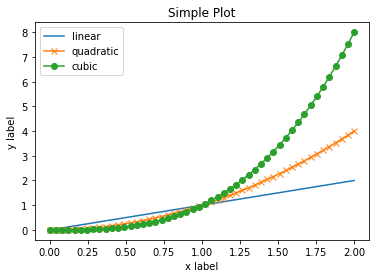

In [2]:
x = np.linspace(0, 2, 50)

plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic', marker='x')
plt.plot(x, x**3, label='cubic', marker='o')

plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Simple Plot")

plt.legend()

plt.show()

### 基本结构

- Figure

/Users/lee/.venv/ml/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


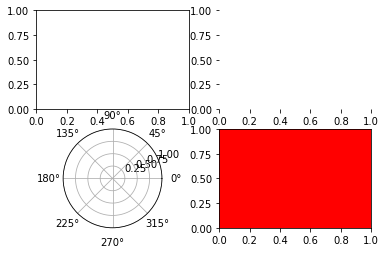

In [55]:
fig = plt.figure()
fig.add_subplot(221)

# equivalent but more general
ax1 = fig.add_subplot(2, 2, 1)

# add a subplot with no frame
ax2 = fig.add_subplot(222, frameon=False)

# add a polar subplot
fig.add_subplot(223, projection='polar')

# add a red subplot that share the x-axis with ax1
fig.add_subplot(224, sharex=ax1, facecolor='red')

#delete x2 from the figure
fig.delaxes(ax2)

#add x2 to the figure again
fig.add_subplot(ax2)

plt.show()

### 多窗口

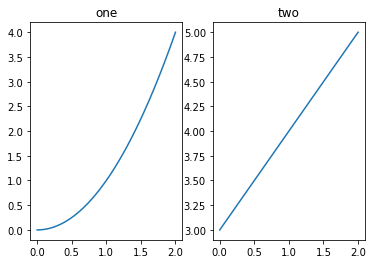

In [56]:
fig, (ax1, ax2) = plt.subplots(1, 2)

x = np.linspace(0, 2, 50)

ax1.set_title('one')
ax1.plot(x, x ** 2, label='linear')
ax2.set_title('two')
ax2.plot(x, x + 3, label='linear')

plt.show()

### 交互模式

- 交互模式下,可连续绘制,使用 **draw()** 刷新.
- 非交互模式下, 使用 **show()** 后无法继续绘制.

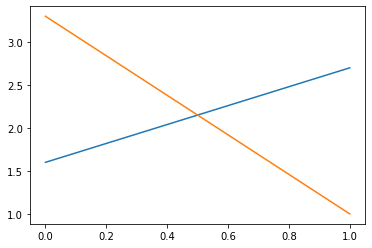

In [81]:
plt.ion()
plt.plot([1.6, 2.7])
plt.plot([3.3, 1.0])
plt.draw()

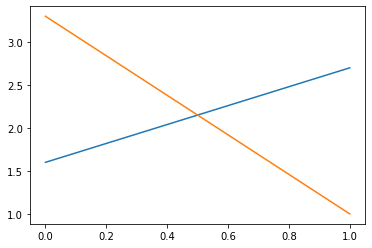

In [80]:
plt.ioff()
plt.plot([1.6, 2.7])
plt.plot([3.3, 1.0])
plt.show()

### pyplot 基本使用方法

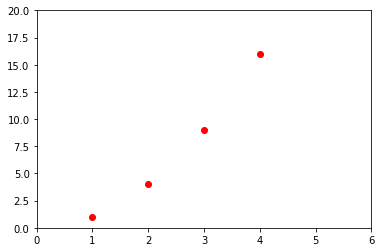

In [85]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()

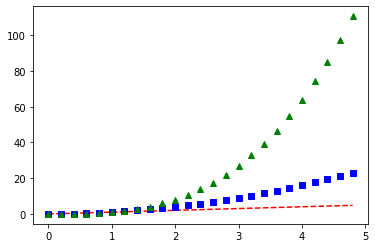

In [87]:
t = np.arange(0., 5., 0.2)

# 红色虚线,蓝色方块,绿色三角
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

data 关键字

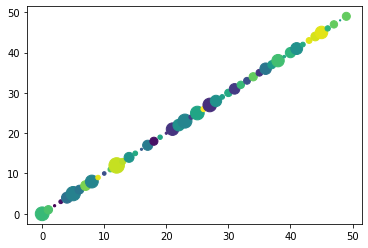

In [120]:
data = {'a': np.arange(50),
        'b': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        's': np.abs(np.random.randn(50)) * 100}

# c : color , s : scale
plt.scatter('a', 'b', c = 'c', s = 's', data=data)
plt.show()

分类

<Figure size 432x288 with 0 Axes>

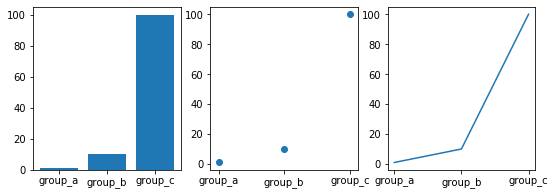

In [180]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.suptitle('Categorical')
plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)

plt.show()

文字

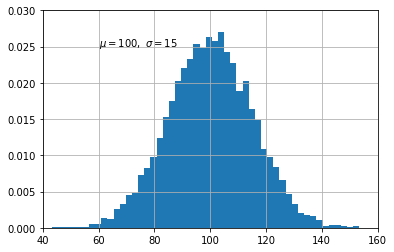

In [187]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

plt.hist(x, 50, density=1)
plt.text(60, .025, '$\mu=100,\ \sigma=15$')
plt.grid(True)
plt.axis([40, 160, 0, 0.03])
plt.show()

标注

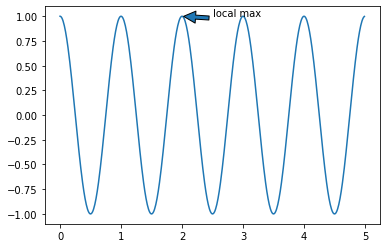

In [197]:
t = np.arange(0., 5., 0.01)

plt.plot(t, np.cos(2*np.pi*t))
plt.annotate('local max', xy=(2,1), xytext=(2.5, 1), arrowprops={'shrink': 0.05})
plt.show()

### 等高线

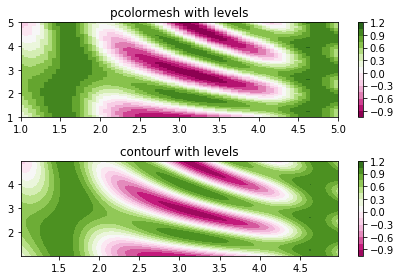

In [203]:
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator


# make these smaller to increase the resolution
dx, dy = 0.05, 0.05

# generate 2 2d grids for the x & y bounds
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]

z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())


# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels.
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')


# contours are *point* based plots, so convert our bound into point
# centers
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots so `ax1` title and `ax0` tick labels
# don't overlap
fig.tight_layout()

plt.show()